In [1]:
import numpy as np

def response(beta1: float, beta2: float, beta3: float, beta4: float, predictor1: float, predictor2: float) -> float:
    """
    Compute the model response based on predictor values and model parameters.

    Parameters:
    beta1, beta2, beta3, beta4 (float): Model parameters
    predictor1, predictor2 (float): Input features

    Returns:
    float: Computed response
    """
    return (beta1 * predictor1 ** beta2) * (beta3 * predictor2 ** beta4)

In [2]:
# Define model parameters
beta1, beta2, beta3, beta4 = 1, 1, 1, -0.9

# Define input data
input1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
input2 = np.ones_like(input1)

# Compute model outputs
model_output = response(beta1, beta2, beta3, beta4, input1, input2)

# Display results
for i in range(len(input1)):
    print(f"Input1: {input1[i]}, Input2: {input2[i]} → Model Output: {model_output[i]:.3f}")

Input1: 10, Input2: 1 → Model Output: 10.000
Input1: 20, Input2: 1 → Model Output: 20.000
Input1: 30, Input2: 1 → Model Output: 30.000
Input1: 40, Input2: 1 → Model Output: 40.000
Input1: 50, Input2: 1 → Model Output: 50.000
Input1: 60, Input2: 1 → Model Output: 60.000
Input1: 70, Input2: 1 → Model Output: 70.000
Input1: 80, Input2: 1 → Model Output: 80.000
Input1: 90, Input2: 1 → Model Output: 90.000
Input1: 100, Input2: 1 → Model Output: 100.000


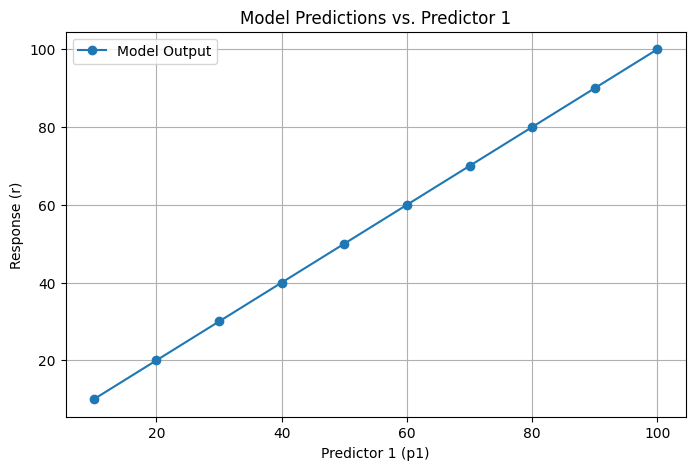

In [3]:
import matplotlib.pyplot as plt

# Plot observed vs. predicted values
plt.figure(figsize=(8,5))
plt.plot(input1, model_output, 'o-', label='Model Output')
plt.xlabel('Predictor 1 (p1)')
plt.ylabel('Response (r)')
plt.title('Model Predictions vs. Predictor 1')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from itertools import product

def optimize_parameters(input1, input2, output, param_grid):
    """
    Finds the best parameters by testing different beta values.

    Parameters:
    input1, input2 (array): Predictor values
    output (array): Observed results
    param_grid (list of tuples): Grid search values for parameters

    Returns:
    tuple: Best parameters (beta1, beta2, beta3, beta4)
    """
    best_params = None
    best_error = float("inf")

    for beta1, beta2, beta3, beta4 in param_grid:
        predictions = response(beta1, beta2, beta3, beta4, input1, input2)
        error = np.mean((predictions - output) ** 2)  # Mean Squared Error (MSE)

        if error < best_error:
            best_error = error
            best_params = (beta1, beta2, beta3, beta4)

    return best_params

# Define search space for parameters
beta_grid = [0.5, 1.0, 1.5, 2.0]
param_combinations = list(product(beta_grid, repeat=4))

# Dummy observed values (replace with actual dataset)
observed_output = np.random.rand(len(input1)) * 50  

# Find best parameters
best_betas = optimize_parameters(input1, input2, observed_output, param_combinations)
print(f"Optimized Parameters: {best_betas}")

Optimized Parameters: (1.5, 0.5, 2.0, 0.5)


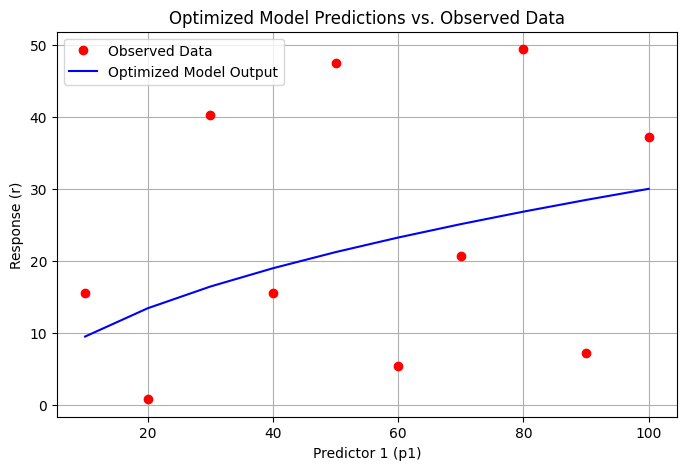

In [5]:
# Visualizing prediction results with optimized parameters
optimized_output = response(*best_betas, input1, input2)

plt.figure(figsize=(8,5))
plt.plot(input1, observed_output, 'ro', label='Observed Data')
plt.plot(input1, optimized_output, 'b-', label='Optimized Model Output')
plt.xlabel('Predictor 1 (p1)')
plt.ylabel('Response (r)')
plt.title('Optimized Model Predictions vs. Observed Data')
plt.legend()
plt.grid(True)
plt.show()